# **Naive Bayes Model**

Naive Bayes is a Probablistic learning algorithm derived from Bayes Theorm. Naive Bayes Model is considered to be extremely fast, reliable, and has stable classification ability relative to other classification algorithms. The algorithm is based on the assumption that each feature in independent of each other while predicting the classification.

<b>Pros:</b>
Simple, fast and well in multi class prediction
Performs better with less training data as it assumes feature independence

<b> Cons:</b>
bad estimator hence the probability outputs are not taken too seriously
Assumptions of independent feature cannot represent real time data
Zero frequency - If training data set gets a category not trained on earlier, then model will assign a 0 (zero) probability and will be unable to make a prediction.  

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification), we will build Multinomial Naive Bayes model for our dataset.

In [0]:
# We will use multinomialNB for this dataset
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score, recall_score
NBModel = MultinomialNB(alpha = 0.001)
NBModel.fit(X_train, y_train)
NB_y_pred = NBModel.predict(X_test)
print('NB Training Accuracy:', NBModel.score(X_train , y_train))
print('NB Test Accuracy:', NBModel.score(X_test , y_test))

NB Training Accuracy: 0.6729411764705883
NB Test Accuracy: 0.5873529411764706


In [0]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='micro'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='micro'))

Precision Score: 0.5873529411764706
Recall Score: 0.5873529411764706


We can see that the Training accuracy is 67% and testing accuracy is 58% with Naive Bayes Mode. The model is able to predict True Positives and False Negatives equally.

In [0]:
print ('Classification Report:', classification_report(y_test, NB_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.96      0.76      1550
           1       0.76      0.28      0.41        57
           2       0.47      0.37      0.41        92
           3       0.33      0.19      0.24        57
           4       0.43      0.14      0.21        43
           5       0.20      0.05      0.08        42
           6       0.85      0.80      0.82        35
           7       0.25      0.05      0.08        40
           8       0.10      0.01      0.02        96
           9       0.61      0.28      0.38        98
          10       0.64      0.33      0.44       124
          11       0.50      0.16      0.24        44
          12       0.00      0.00      0.00        28
          13       0.55      0.16      0.25        37
          14       0.45      0.07      0.12        69
          15       0.29      0.05      0.09        38
          16       0.31      0.11      0.16        36
    

### Hyper parameter tuning and comparing with other Naive Bayes Algorithms

In [0]:
from sklearn.model_selection import cross_validate

In [0]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import warnings

def find_optimal_k(X,y, lr_list):
   
    # empty list that will hold cv scores
    scores = []

    # splitting training test dataset in 60-40 ratio
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.40, random_state=42)

    for lr in lr_list:
        model_nb = MultinomialNB(alpha = lr)
        model = model_nb.fit(X_train, y_train)

        # predict the response on the crossvalidation train
        predict = model.predict(X_test)

        # evaluate accuracy
        accuracy = accuracy_score(y_test, predict, normalize=True)
        scores.append(accuracy)
        
    # changing to misclassification error
    mean_square_error = [1 - x for x in scores]

    # determining best alpha
    optimal_alpha = lr_list[mean_square_error.index(min(mean_square_error))]
    print('\nThe optimal alpha is ', optimal_alpha)


    plt.figure(figsize=(10,6))
    plt.plot(lr_list,mean_square_error,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. alpha Value')
    plt.xlabel('alpha')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(mean_square_error,3))
    
    return optimal_alpha


The optimal alpha is  0.0008700000000000001
the misclassification error for each k value is :  [0.406 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405
 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405
 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405 0.405
 0.405 0.405 0.405 0.405 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404
 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404
 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404
 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404
 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404 0.404
 0.404 0.404 0.404]
0.0008700000000000001


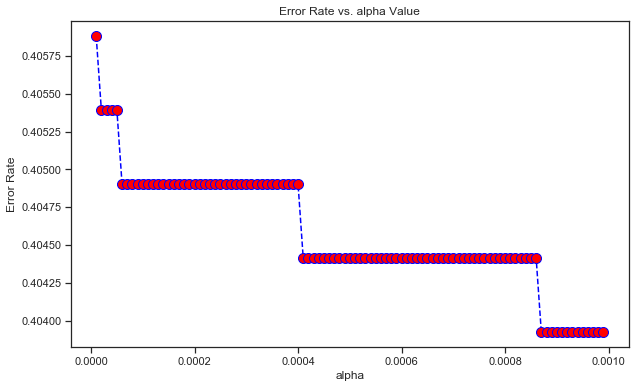

In [0]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

lr_lst = np.arange(0.00001, 0.001, 0.00001)
best_lr = find_optimal_k(X_train ,y_train,lr_lst)

print(best_lr)

In [0]:
NBModel = MultinomialNB(alpha = best_lr)
NBModel.fit(X_train, y_train)
NB_y_pred = NBModel.predict(X_test)
print('NB Training Accuracy:', NBModel.score(X_train , y_train))
print('NB Test Accuracy:', NBModel.score(X_test , y_test))

NB Training Accuracy: 0.6731372549019607
NB Test Accuracy: 0.5873529411764706


In [0]:
NB_Alorithm = [    
    
        # Naive Bayes
        MultinomialNB(alpha = best_lr),
        BernoulliNB(),
        GaussianNB(),
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .4, train_size = .6, random_state = 42)
NB_columns = ['Algorithm Name','Algorithm Train Accuracy Mean', 'Algorithm Test Accuracy Mean','Algorithm Time']
NB_dataframe = pd.DataFrame(columns = NB_columns)

row_index = 0
for alg in NB_Alorithm:
    NB_Alorithm_name = alg.__class__.__name__
    NB_dataframe.loc[row_index, 'Algorithm Name'] = NB_Alorithm_name
    cv_results = cross_validate(alg, X,y, cv  = cv_split, return_train_score=True)
    
    NB_dataframe.loc[row_index, 'Algorithm Time'] = cv_results['fit_time'].mean()
    NB_dataframe.loc[row_index, 'Algorithm Train Accuracy Mean'] = cv_results['train_score'].mean()
    NB_dataframe.loc[row_index, 'Algorithm Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

NB_dataframe.sort_values(by = ['Algorithm Test Accuracy Mean'], ascending = False, inplace = True)

In [0]:
NB_dataframe

,Algorithm Name,Algorithm Train Accuracy Mean,Algorithm Test Accuracy Mean,Algorithm Time
0,MultinomialNB,0.665647,0.597735,0.0293461
1,BernoulliNB,0.587294,0.539529,0.0378556
2,GaussianNB,0.315118,0.195412,0.0857493


In [0]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='micro'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='micro'))

Precision Score: 0.5873529411764706
Recall Score: 0.5873529411764706


As expected, we get the best accuracy with MultinomialNB as it is more optimal algorithm for discrete values like word count. Bernoulli is more suitable for binary and boolean data values like True/False and 0/1. While Gaussian is would have been our choice if the features were in decimal form.

With trying with different learning rates, the best value is achieved at 0.00087, which gives a test accuracy of 58.73% and training accuracy of 67.31 %. By using ShuffleSplit with 10 splits(creating random samples of the entire dataset during each iteration to generate a training set and a test set) we get an Average Train Accuracy of 66.56% and Average Test Accuracy of 59.77% with the least fit-time, time for fitting the estimator on the train set for each cv split, of 0.029 seconds.

In [0]:
print ('Classification Report:', classification_report(y_test, NB_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.96      0.76      1550
           1       0.76      0.28      0.41        57
           2       0.47      0.37      0.41        92
           3       0.33      0.19      0.24        57
           4       0.43      0.14      0.21        43
           5       0.20      0.05      0.08        42
           6       0.85      0.80      0.82        35
           7       0.25      0.05      0.08        40
           8       0.10      0.01      0.02        96
           9       0.61      0.28      0.38        98
          10       0.64      0.33      0.44       124
          11       0.50      0.16      0.24        44
          12       0.00      0.00      0.00        28
          13       0.55      0.16      0.25        37
          14       0.45      0.07      0.12        69
          15       0.29      0.05      0.09        38
          16       0.31      0.11      0.16        36
    